使用pytorch进行图像分割

Downloading: "https://download.pytorch.org/models/fcn_resnet101_coco-7ecb50ca.pth" to C:\Users\Administrator/.cache\torch\hub\checkpoints\fcn_resnet101_coco-7ecb50ca.pth
100%|██████████| 208M/208M [00:25<00:00, 8.41MB/s] 


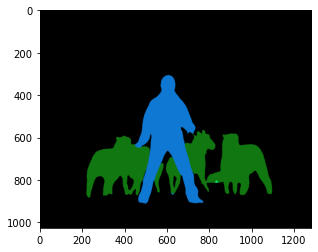

In [16]:
import torch
from PIL import Image
from matplotlib import pyplot as plt
from torchvision import transforms


# %% 1、加载模型
# # GitHub远程仓库加载
# repo = 'pytorch/vision:0.11.0'
# model_name = 'deeplabv3_resnet101'
# model = torch.hub.load(repo, model_name, source='github', pretrained=True)

# 本地模型加载
path = r'C:\Users\Administrator\.cache\torch\hub\vision-0.11.0'
model_name = 'fcn_resnet101'#'deeplabv3_resnet101'
model = torch.hub.load(path, model_name, source='local', pretrained=True)

model.eval()


# %% 2、读取图像数据
filename = 'deeplab2.png'
input_image = Image.open(filename)
input_image = input_image.convert("RGB")
plt.imshow(input_image)

# %% 3、模型训练
# sample execution (requires torchvision)
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)

# %% 4、结果展示
# create a color pallette, selecting a color for each class
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# plot the semantic segmentation predictions of 21 classes in each color
r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r.putpalette(colors)

import matplotlib.pyplot as plt
plt.imshow(r)
# plt.show()


In [4]:
# # Download an example image from the pytorch website
# import urllib
# url, filename = ("https://github.com/pytorch/hub/raw/master/images/deeplab1.png", "deeplab1.png")
# try: urllib.URLopener().retrieve(url, filename)
# except: urllib.request.urlretrieve(url, filename)
